In [10]:
import torch
import torchvision.transforms as transforms
from dataset import ReadImages
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import numpy as np
import cv2
from utils import *
from scipy import misc

%matplotlib inline

In [25]:
dataset = 'data/pre_proc/fourviere_clean2_224sq'
dataset_test = 'data/pre_proc/fourviere_clean2_224sq/test'
collection = 'fou'

def match(x):
    if collection == 'cli':
        return x.split('/')[-1].split('-')[0]
    else:
        s = x.split('/')[-1].split('_')
        return s[0] + s[1]
# training and test sets (scaled to 300 on the small side)
dataSetFull = ReadImages.readImageswithPattern(dataset, match)
testSetFull = ReadImages.readImageswithPattern(dataset_test, match)
labels = list(set(lab for im, lab in dataSetFull))

[('data/pre_proc/fourviere_clean2_224sq/test/D_083_05.jpg', 'D083'), ('data/pre_proc/fourviere_clean2_224sq/test/D_082_17.jpg', 'D082')]
((224, 224, 3), 94.294789009353735, [95.42552216198979, 94.95143096301021, 92.50741390306122])


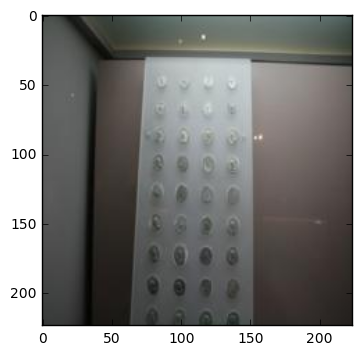

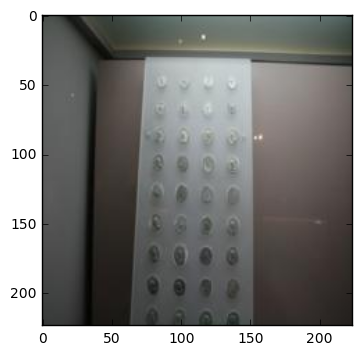

((224, 224, 3), 93.236919377125844, [94.533183195153057, 94.597895408163268, 90.57967952806122])


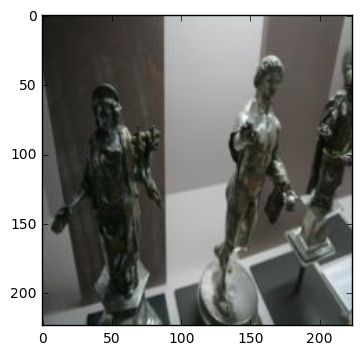

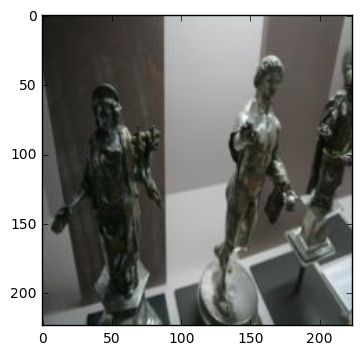

In [26]:
print(testSetFull[:2])
for im, lab in testSetFull[:2]:
    if lab in labels:
        im_o = imread_rgb(im)
        print(im_o.shape, np.mean(im_o), [np.mean(im_o[:,:,i]) for i in range(3)])
        plt.imshow(im_o / 255.)
        plt.show()
        t = transforms.ToPILImage()(transforms.ToTensor()(im_o))
        plt.imshow(t)
        plt.show()

In [29]:
lab_dict ={}
for im, lab in testSetFull:
    if lab in labels:
        if lab in lab_dict:
            lab_dict[lab] += 1
        else:
            lab_dict[lab] = 1
print(len(lab_dict))
print(len(testSetFull))
print(sum(lab_dict[x] for x in lab_dict))
print(sum(lab_dict[lab] for im, lab in testSetFull))
print(sorted(lab_dict.items(), key=lambda x: x[1]))

166
184
184
226
[('A038', 1), ('A039', 1), ('C088', 1), ('A033', 1), ('C087', 1), ('C086', 1), ('A036', 1), ('A037', 1), ('D031', 1), ('D030', 1), ('D033', 1), ('D032', 1), ('D035', 1), ('D037', 1), ('D036', 1), ('D039', 1), ('B047', 1), ('B045', 1), ('B043', 1), ('B040', 1), ('B041', 1), ('C012', 1), ('C010', 1), ('C014', 1), ('C015', 1), ('B027', 1), ('B020', 1), ('B028', 1), ('B029', 1), ('C004', 1), ('C007', 1), ('A062', 1), ('C001', 1), ('C008', 1), ('C031', 1), ('D045', 1), ('D046', 1), ('B052', 1), ('D040', 1), ('D041', 1), ('B059', 1), ('B058', 1), ('B037', 1), ('B036', 1), ('B032', 1), ('B031', 1), ('B030', 1), ('B039', 1), ('C071', 1), ('C074', 1), ('A054', 1), ('B050', 1), ('C079', 1), ('D056', 1), ('D053', 1), ('A024', 1), ('A029', 1), ('D058', 1), ('B002', 1), ('B003', 1), ('B006', 1), ('B007', 1), ('B004', 1), ('B005', 1), ('B009', 1), ('C062', 1), ('C060', 1), ('C069', 1), ('C068', 1), ('A050', 1), ('A053', 1), ('D066', 1), ('A055', 1), ('A056', 1), ('A057', 1), ('A058',

In [28]:
A = np.array(sorted(lab_dict[lab] for lab in lab_dict))
print(np.sum(A))
print(np.mean(A))
print(np.median(A))

184
1.10843373494
1.0


In [5]:
dataSet, testSet = [], []
for im, lab in dataSetFull:
    if lab in labels:
        im_o = imread_rgb(im)
        h, w, _ = im_o.shape
        dataSet.append((im, lab, w, h))
for im, lab in testSetFull:
    if lab in labels:
        im_o = imread_rgb(im)
        h, w, _ = im_o.shape
        testSet.append((im, lab, w, h))

In [6]:
dataSet.sort(key=lambda x: float(min(x[2:])) / max(x[2:]))
testSet.sort(key=lambda x: float(min(x[2:])) / max(x[2:]))

In [7]:
print(dataSet[:10])
print(dataSet[-10:])
print(testSet[:10])
print(testSet[-10:])
for im, lab, w, h in dataSet:
    if min(w, h) != 384:
        print(im, lab, w, h)
for im, lab, w, h in testSet:
    if min(w, h) != 384:
        print(im, lab, w, h)

[('data/pre_proc/fourviere_clean2_384/B_098_02.jpg', 'B098', 384, 578), ('data/pre_proc/fourviere_clean2_384/B_098_01.jpg', 'B098', 384, 578), ('data/pre_proc/fourviere_clean2_384/B_098_00.jpg', 'B098', 384, 578), ('data/pre_proc/fourviere_clean2_384/B_097_01.jpg', 'B097', 384, 578), ('data/pre_proc/fourviere_clean2_384/B_097_00.jpg', 'B097', 384, 578), ('data/pre_proc/fourviere_clean2_384/B_096_02.jpg', 'B096', 384, 578), ('data/pre_proc/fourviere_clean2_384/B_096_00.jpg', 'B096', 384, 578), ('data/pre_proc/fourviere_clean2_384/B_095_02.jpg', 'B095', 384, 578), ('data/pre_proc/fourviere_clean2_384/B_095_01.jpg', 'B095', 384, 578), ('data/pre_proc/fourviere_clean2_384/B_095_00.jpg', 'B095', 384, 578)]
[('data/pre_proc/fourviere_clean2_384/D_001_05.jpg', 'D001', 576, 384), ('data/pre_proc/fourviere_clean2_384/D_001_04.jpg', 'D001', 576, 384), ('data/pre_proc/fourviere_clean2_384/D_001_02.jpg', 'D001', 576, 384), ('data/pre_proc/fourviere_clean2_384/D_001_01.jpg', 'D001', 576, 384), ('da